In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('EDA_Variables.csv')
data = df.copy()
df.head()

,class,Attribute1,Attribute2_BINNED,Attribute3,Attribute4,Attribute6,Attribute7,Attribute8_BINNED,Attribute9,Attribute10,Attribute12,Attribute15,Attribute20
0,0,0.818099,1.280934,-0.733741,-0.410063,-0.704246,-0.235566,-0.157300,-0.165548,-0.000525,-0.461035,-0.194156,0.034867
1,0,0.818099,0.267315,-0.733741,-0.410063,-0.704246,-0.235566,0.155466,-0.165548,-0.000525,-0.461035,-0.194156,0.034867
2,0,0.818099,-0.524524,-0.733741,-0.410063,-0.704246,-0.235566,0.155466,-0.165548,-0.000525,-0.461035,-0.194156,0.034867
3,0,0.818099,-0.524524,-0.733741,-0.410063,-0.704246,-0.235566,0.155466,-0.165548,-0.000525,-0.461035,-0.194156,0.034867
4,0,0.818099,-0.108688,-0.733741,-0.410063,-0.704246,-0.235566,0.064539,-0.165548,-0.000525,-0.461035,-0.194156,0.034867


In [3]:
print("Attribute3 :", df["Attribute3"].unique())
print("Attribute1 :", df["Attribute1"].unique())
print("Attribute4 :", df["Attribute4"].unique())
print("Attribute6 :", df["Attribute6"].unique())
print("Attribute7 :", df["Attribute7"].unique())
print("Attribute9 :", df["Attribute9"].unique())
print("Attribute10 :",df["Attribute10"].unique())
print("Attribute12 :",df["Attribute12"].unique())
print("Attribute15 :",df["Attribute15"].unique())
print("Attribute20 :",df["Attribute20"].unique())

Attribute3 : [-0.73374058  0.08831862  0.08515781  1.35812348  1.13497993]
Attribute1 : [ 0.81809871  0.40139178 -1.17626322 -0.40546511]
Attribute4 : [-0.41006282  0.6061358   0.09555652  0.35920049 -0.77383609  0.23052366
  0.15415068  0.28768207  0.51082562 -1.23214368]
Attribute6 : [-0.70424607  0.27135784 -0.70605059 -1.09861229  0.13955188]
Attribute7 : [-0.23556607  0.03210325 -0.39441527  0.31923043  0.47082029]
Attribute9 : [-0.16554761  0.23534083  0.44183275 -0.13851893]
Attribute10 : [-5.25072209e-04 -5.87786665e-01  6.02175402e-01]
Attribute12 : [-0.46103496  0.02857337  0.58608236  0.03419136]
Attribute15 : [-0.19415601  0.47260441  0.40444522]
Attribute20 : [ 0.03486727 -1.26291534]


In [4]:
X = df.drop("class", axis = 1)
y = df["class"]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lasso.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')

In [7]:
coefficients = lasso.coef_[0]
feature_names = X.columns.tolist()
lasso_results = pd.DataFrame({
    'Feature': feature_names,
    'LASSO Coefficient': coefficients
})

In [8]:
lasso_results['Absolute Coefficient'] = np.abs(lasso_results['LASSO Coefficient'])
lasso_results = lasso_results.sort_values(by='Absolute Coefficient', ascending=False)
lasso_results

,Feature,LASSO Coefficient,Absolute Coefficient
0,Attribute1,0.723540,0.723540
1,Attribute2_BINNED,-0.555027,0.555027
2,Attribute3,0.440541,0.440541
4,Attribute6,0.372631,0.372631
3,Attribute4,0.359077,0.359077
11,Attribute20,0.270553,0.270553
9,Attribute12,0.231394,0.231394
8,Attribute10,0.178125,0.178125
5,Attribute7,0.150062,0.150062
7,Attribute9,0.143087,0.143087


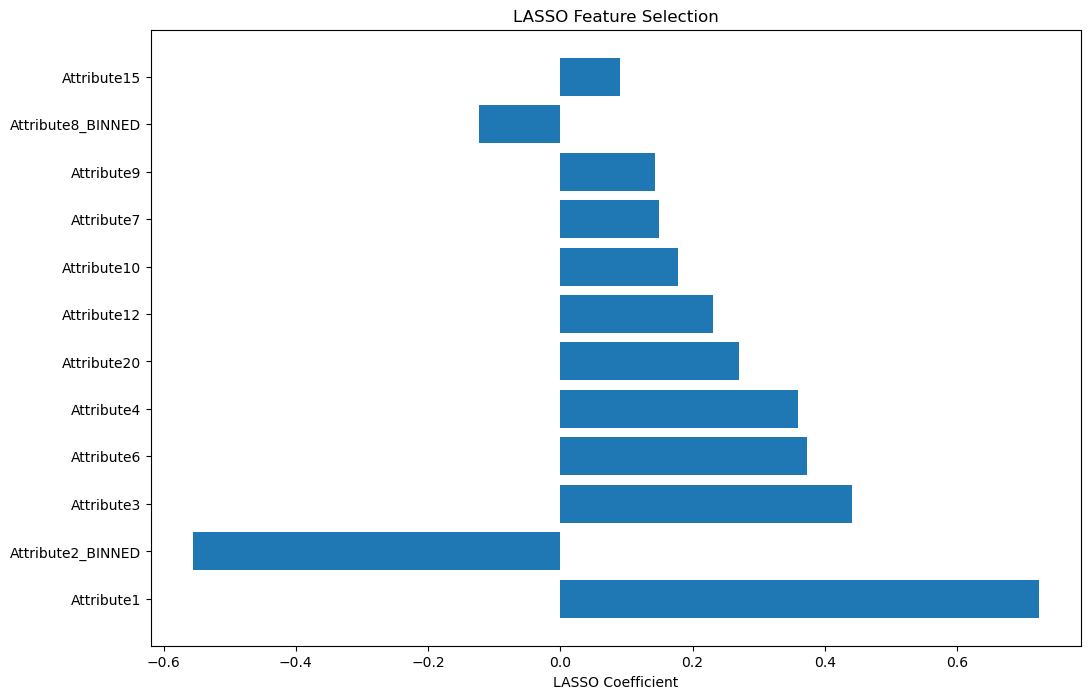

In [9]:
plt.figure(figsize=(12, 8))
plt.barh(lasso_results['Feature'], lasso_results['LASSO Coefficient'])
plt.xlabel('LASSO Coefficient')
plt.title('LASSO Feature Selection')
plt.show()

In [10]:
correlation_matrix = df.corr()
correlation_matrix

,class,Attribute1,Attribute2_BINNED,Attribute3,Attribute4,Attribute6,Attribute7,Attribute8_BINNED,Attribute9,Attribute10,Attribute12,Attribute15,Attribute20
class,1.000000,0.276531,-0.186347,0.201951,0.142313,0.145987,0.108104,-0.058360,0.078372,0.064188,0.122608,0.108931,0.061099
Attribute1,0.276531,1.000000,-0.051531,0.170959,0.117987,0.200569,0.116138,-0.016138,0.047091,-0.081034,0.031745,0.108105,-0.032917
Attribute2_BINNED,-0.186347,-0.051531,1.000000,-0.037633,-0.026520,-0.027204,-0.020145,0.142889,-0.014604,-0.011961,-0.022848,-0.020299,-0.011386
Attribute3,0.201951,0.170959,-0.037633,1.000000,-0.002241,0.025226,0.124589,-0.011786,0.042571,-0.048035,0.042685,0.073813,0.021503
Attribute4,0.142313,0.117987,-0.026520,-0.002241,1.000000,0.074731,0.066043,-0.008305,0.070088,0.066253,0.008360,0.020837,-0.097057
Attribute6,0.145987,0.200569,-0.027204,0.025226,0.074731,1.000000,0.098708,-0.008520,0.006306,-0.060968,-0.015431,0.003699,0.004572
Attribute7,0.108104,0.116138,-0.020145,0.124589,0.066043,0.098708,1.000000,-0.006309,0.190263,0.013516,-0.051503,0.028887,-0.039570
Attribute8_BINNED,-0.058360,-0.016138,0.142889,-0.011786,-0.008305,-0.008520,-0.006309,1.000000,-0.004574,-0.003746,-0.007155,-0.006357,-0.003566
Attribute9,0.078372,0.047091,-0.014604,0.042571,0.070088,0.006306,0.190263,-0.004574,1.000000,-0.002689,-0.072808,0.051741,0.072243
Attribute10,0.064188,-0.081034,-0.011961,-0.048035,0.066253,-0.060968,0.013516,-0.003746,-0.002689,1.000000,0.141971,0.045661,0.013806


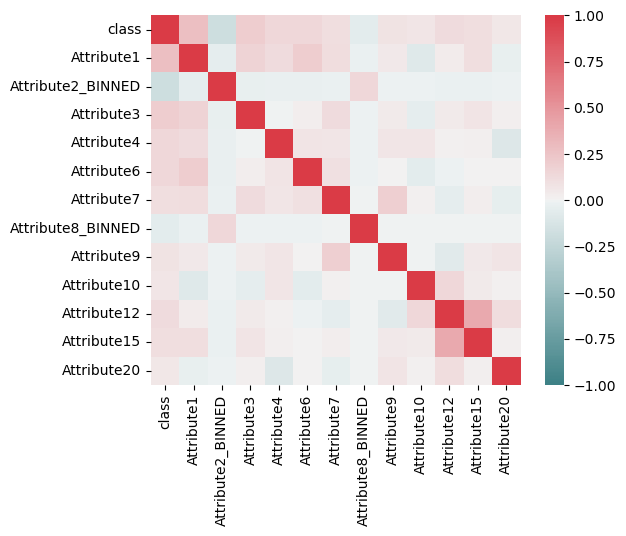

In [11]:
import seaborn as sns
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(200, 10, n=500), square=True)
plt.show()

# LR model

In [12]:
final_data = df.copy()

In [13]:
x = final_data.drop("class", axis = 1)
y = final_data["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [16]:
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy :",accuracy)

accuracy : 0.8592672413793103


In [17]:
y_scores = lr.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

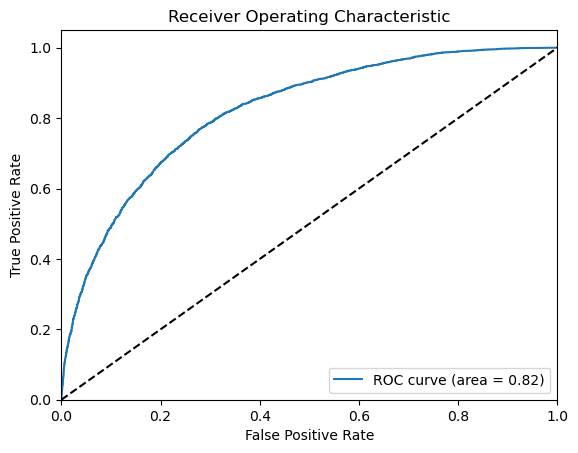

In [18]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [19]:
auc_score = auc(fpr, tpr)
print(f"AUC score: {round(auc_score, 3)}.")

print(classification_report(y_test, y_pred))

AUC score: 0.82.
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     97907
           1       0.63      0.23      0.34     18093

    accuracy                           0.86    116000
   macro avg       0.75      0.60      0.63    116000
weighted avg       0.84      0.86      0.83    116000



# Random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
X = final_data.drop("class", axis = 1)
y = final_data["class"]

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.35, random_state=42)

In [22]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print(classification_report(y_test, y_pred))

Accuracy: 0.9865615763546798
Precision: 0.986597586338972
Recall: 0.9865615763546798
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    171301
           1       0.99      0.92      0.96     31699

    accuracy                           0.99    203000
   macro avg       0.99      0.96      0.97    203000
weighted avg       0.99      0.99      0.99    203000



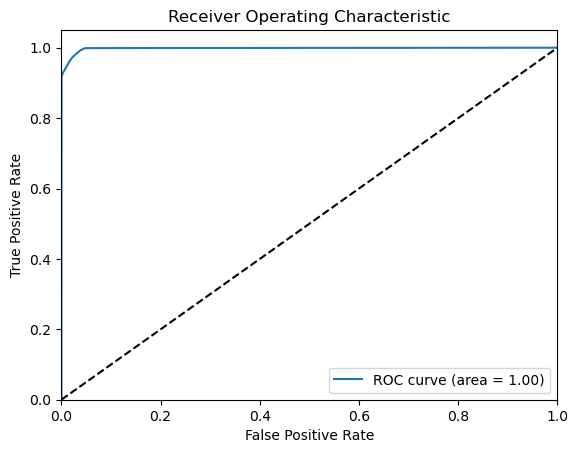

In [24]:
y_scores = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
model = Sequential()

classifier = Sequential()
classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dense(units =13, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=35, batch_size=10)

Epoch 1/35
37700/37700 [==============================] - 341s 9ms/step - loss: 0.3221 - accuracy: 0.8693 - val_loss: 0.2970 - val_accuracy: 0.8818
Epoch 2/35
37700/37700 [==============================] - 164s 4ms/step - loss: 0.2788 - accuracy: 0.8891 - val_loss: 0.2682 - val_accuracy: 0.8911
Epoch 3/35
37700/37700 [==============================] - 174s 5ms/step - loss: 0.2603 - accuracy: 0.8962 - val_loss: 0.2537 - val_accuracy: 0.8976
Epoch 4/35
37700/37700 [==============================] - 222s 6ms/step - loss: 0.2484 - accuracy: 0.9021 - val_loss: 0.2416 - val_accuracy: 0.9072
Epoch 5/35
37700/37700 [==============================] - 204s 5ms/step - loss: 0.2382 - accuracy: 0.9075 - val_loss: 0.2324 - val_accuracy: 0.9065
Epoch 6/35
37700/37700 [==============================] - 169s 4ms/step - loss: 0.2319 - accuracy: 0.9109 - val_loss: 0.2394 - val_accuracy: 0.9071
Epoch 7/35
37700/37700 [==============================] - 129s 3ms/step - loss: 0.2284 - accuracy: 0.9121 - val_

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)


6344/6344 [==============================] - 8s 1ms/step
********************
20300/20300 [==============================] - 30s 1ms/step - loss: 0.1474 - accuracy: 0.9468
Test score: 0.14742065966129303
Test accuracy: 0.9468374252319336


In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[170306,    995],
       [  9797,  21902]], dtype=int64)

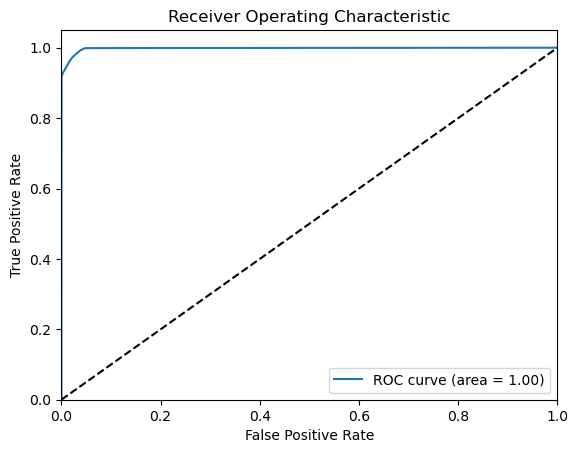

In [30]:
y_scores = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    171301
           1       0.96      0.69      0.80     31699

    accuracy                           0.95    203000
   macro avg       0.95      0.84      0.89    203000
weighted avg       0.95      0.95      0.94    203000

